Датасет https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

## Загрузка библиотек, данных и первичная оработка 

In [55]:
#Импорт библиотек
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
plt.style.use(['dark_background'])
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [56]:
# загрузка данных
data = pd.read_csv('car.data')
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [57]:
data.shape

(1728, 7)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [59]:
#судя по описанию на сайте, датасет предствляет из себя описание признаков эвакуированных машин
#классов машин всего 4 unacc, acc, good, vgood, так как они идут от наихудшего к наилучшему
#, то можно их пронумеровть от 1 до 4
# аналогично можно поступить с категориальными перемерменными buting, maint и lug_bust

In [60]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [61]:
data['buying'].value_counts()

med      432
vhigh    432
low      432
high     432
Name: buying, dtype: int64

In [62]:
data['doors'].value_counts()

5more    432
3        432
4        432
2        432
Name: doors, dtype: int64

In [63]:
# заменю 5more просто на 5, так как рапределение пропорциональное и получу в итоге поде с числом
data['doors'] = data['doors'].str.replace('5more','5')
data['doors']= data['doors'].astype(int)


In [64]:
data['persons'].value_counts()

more    576
4       576
2       576
Name: persons, dtype: int64

In [65]:
data['persons'] = data['persons'].str.replace('more','5')
data['persons']= data['persons'].astype(int)

In [66]:
data['maint'].value_counts()

med      432
vhigh    432
low      432
high     432
Name: maint, dtype: int64

In [67]:
data['lug_boot'].value_counts()

med      576
big      576
small    576
Name: lug_boot, dtype: int64

In [68]:
data['safety'].value_counts()

med     576
low     576
high    576
Name: safety, dtype: int64

In [69]:
# видно, что пример учебный, так как признаки распредлены равномерно по категориям,
# в реальной жизни такое очень редко встречается

In [70]:
def safety_map(label):
    if  label == 'low':
        return 1
    if  label == 'med':
        return 2
    else:
        return 3
def lug_boot_map(label):
    if  label == 'small':
        return 1
    if  label == 'med':
        return 2
    else:
        return 3
def maint_map(label):
    if  label == 'low':
        return 1
    if  label == 'med':
        return 2
    if  label == 'high':
        return 3
    else:
        return 4
def buying_map(label):
    if  label == 'low':
        return 1
    if  label == 'med':
        return 2
    if  label == 'high':
        return 3
    else:
        return 4
def class_map(label):
    if  label == 'unacc':
        return 1
    if  label == 'acc':
        return 2
    if  label == 'good':
        return 3
    else:
        return 4
        

In [71]:
data['safety'] = data['safety'].apply(lambda x :safety_map(x))
data['lug_boot'] = data['lug_boot'].apply(lambda x :lug_boot_map(x))
data['maint'] = data['maint'].apply(lambda x :maint_map(x))
data['buying'] = data['buying'].apply(lambda x :buying_map(x))
data['class'] = data['class'].apply(lambda x :class_map(x))
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


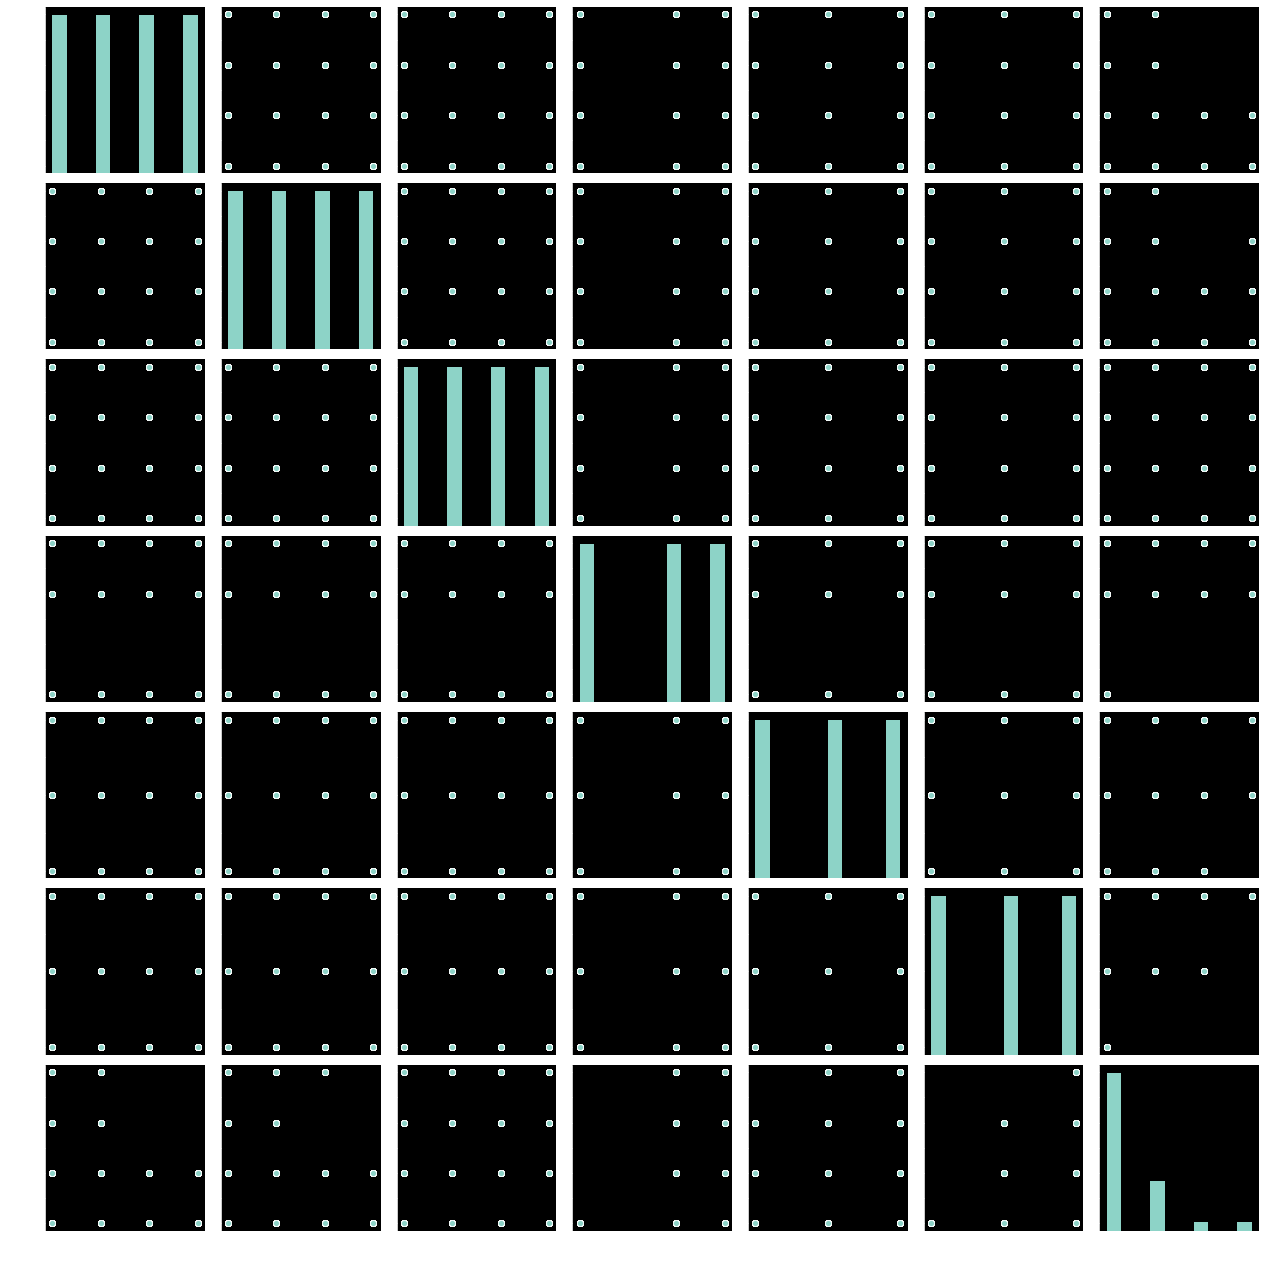

In [22]:
#подтверждение того, что данные придуманные
sns.pairplot(data)

## Выделение кластеров

In [24]:
from sklearn.cluster import KMeans
from sklearn import metrics

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

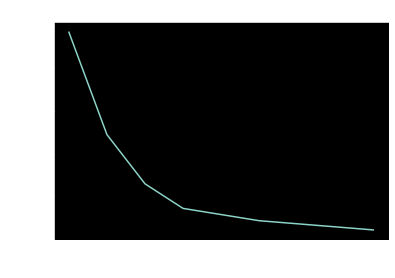

In [35]:
X = data.drop(columns = ['class'])
inertia = []
k = range(1, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(X)
    km.fit(X)
    inertia.append(km.inertia_)
 
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')

[0.5133666362799263, 0.5583727679326086, 0.6172713067295392, 0.5740935433738447, 0.6306807127678432, 0.6671864948423937, 0.6777516328423744, 0.7700348432055748]


Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

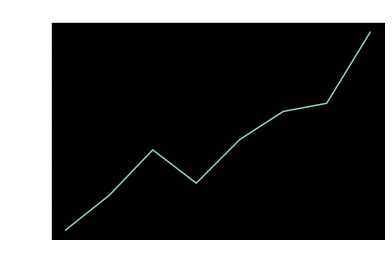

In [36]:
from sklearn.metrics import silhouette_score
inertia = []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(X)
    km.fit(X)
    inertia.append(silhouette_score(X, km.labels_))

print(inertia)
    
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')

In [73]:
# по графику инерции видно, что оптимальное кол-во кластеров 4
data['clasters'] = KMeans(n_clusters=4).fit(X).labels_
data.head()

,buying,maint,doors,persons,lug_boot,safety,class,clasters
0,4,4,2,2,1,1,1,3
1,4,4,2,2,1,2,1,3
2,4,4,2,2,1,3,1,3
3,4,4,2,2,2,1,1,3
4,4,4,2,2,2,2,1,3


In [80]:
# проверка соответствия выделенных кластеров и классов датаеста
pd.crosstab(index= data['class'], columns = data.clasters)

clasters,0,1,2,3
class,,,,
1,296,338,288,288
2,204,180,0,0
3,36,33,0,0
4,40,25,0,0


## Выводы

1. Модель K-means достаточно точно выдела 4 кластера, что соответствует классам ма